Main question: Is price a factor that plays into hotel booking cancellations, and which types of bookings are the most expensive?

Import packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression # Import linear regression model

I used lasso to help pick a model from feature space and to reduce ommitted variable bias and multi-collinearity.

Data cleaning

In [9]:
df = pd.read_csv('cleaned_hotel_booking.csv')

In [15]:
lasso_df = df
lasso_df = lasso_df.drop(['arrival_date'], axis=1)
lasso_df = lasso_df.drop(['arrival_date_year'], axis=1)
lasso_df = lasso_df.drop(['arrival_date_month'], axis=1)
lasso_df = lasso_df.drop(['arrival_date_day_of_month'], axis=1)
lasso_df = lasso_df.drop(['arrival_date_week_number'], axis=1)
lasso_df = lasso_df.drop(['hotel'], axis=1)

In [17]:
lasso_df = lasso_df.drop(['country'], axis=1)
lasso_df = lasso_df.drop(['meal'], axis=1)
lasso_df = lasso_df.drop(['reservation_status_date'], axis=1)

In [19]:
lasso_df = lasso_df.drop(['market_segment'], axis=1)
lasso_df = lasso_df.drop(['distribution_channel'], axis=1)


In [22]:
ddf1 = pd.get_dummies(lasso_df['deposit_type'], dtype=int)
ddf2 = pd.get_dummies(lasso_df['customer_type'], dtype=int)
ddf3 = pd.get_dummies(lasso_df['reservation_status'], dtype=int)

In [ ]:
lasso_df = lasso_df.drop(['deposit_type'], axis=1)
lasso_df = lasso_df.drop(['customer_type'], axis=1)
lasso_df = lasso_df.drop(['reservation_status'], axis=1)

In [28]:
clean_lasso = pd.concat([lasso_df,ddf1,ddf2,ddf3], axis=1)
clean_lasso.head()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,stays_total_nights,adults,children,babies,is_repeated_guest,previous_cancellations,...,No Deposit,Non Refund,Refundable,Contract,Group,Transient,Transient-Party,Canceled,Check-Out,No-Show
0,0,7,0,1,1,1,0.0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
1,0,13,0,1,1,1,0.0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
2,0,14,0,2,2,2,0.0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
3,0,14,0,2,2,2,0.0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,0,0,0,2,2,2,0.0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [29]:
clean_lasso['intercept']=np.ones(clean_lasso.shape[0])


In [30]:
print(clean_lasso.isna().sum())
clean_lasso = clean_lasso.dropna()
print(clean_lasso.isna().sum())

is_canceled                       0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
stays_total_nights                0
adults                            0
children                          4
babies                            0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
required_car_parking_spaces       0
total_of_special_requests         0
No Deposit                        0
Non Refund                        0
Refundable                        0
Contract                          0
Group                             0
Transient                         0
Transient-Party                   0
Canceled                          0
Check-Out                         0
No-Show                           0
intercept                         0
dtype: int64
is_canceled    

<Axes: >

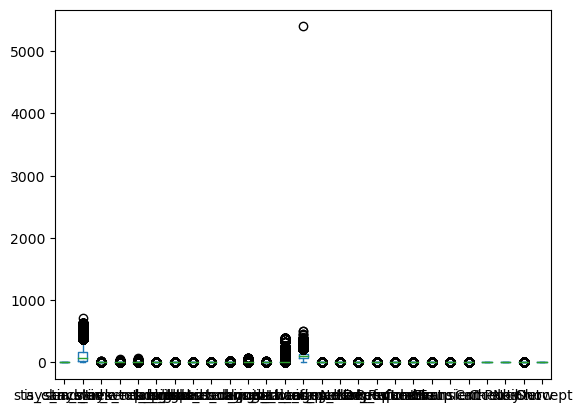

In [31]:
clean_lasso.plot.box()

Numeric Variables:

In [33]:
y = clean_lasso['adr']
var_num = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'stays_total_nights', 'adults', 'children', 'babies', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests']

In [36]:
X_num = clean_lasso.loc[:,var_num]

Dummies:

In [35]:
var_cat = ['is_canceled', 'is_repeated_guest', 'No Deposit', 'Non Refund', 'Refundable', 'Contract', 'Group', 'Transient', 'Transient-Party', 'Canceled', 'Check-Out', 'No-Show']

In [45]:
dummies = clean_lasso.loc[:,var_cat]

In [46]:
X = pd.concat([X_num, dummies],axis=1)


In [47]:
X.columns = X.columns.astype(str)

In [48]:
# Scale data:
from sklearn import linear_model

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
scaler.fit(X)
X_sc = scaler.transform(X)

In [49]:
# Run LASSO:
reg = linear_model.Lasso(alpha=1.0,
                         warm_start=True,
                         max_iter=2000,
                         fit_intercept=True)
reg.fit(X_sc,y)

sdf = pd.DataFrame({'variable': X.columns, 'slope':reg.coef_})
sdf

,variable,slope
0,lead_time,-3.275545
1,stays_in_weekend_nights,-0.000000
2,stays_in_week_nights,0.000000
3,stays_total_nights,-0.000000
4,adults,10.591240
5,children,13.937894
6,babies,0.000000
7,previous_cancellations,-1.163512
8,previous_bookings_not_canceled,-0.000000
9,booking_changes,0.817179


Base on the slope values, the following variables were selected for the linear regression model.

- lead_time
- adults
- children
- previous_cancellations
- total_of_special_requests
- Transient
- Canceled

In [70]:
linear_df = clean_lasso[['adr', 'lead_time', 'adults', 'children', 'previous_cancellations', 'total_of_special_requests', 'Transient', 'Canceled']]
linear_df.head()

,adr,lead_time,adults,children,previous_cancellations,total_of_special_requests,Transient,Canceled
0,75.0,7,1,0.0,0,0,1,0
1,75.0,13,1,0.0,0,0,1,0
2,98.0,14,2,0.0,0,1,1,0
3,98.0,14,2,0.0,0,1,1,0
4,107.0,0,2,0.0,0,0,1,0


In [52]:
linear_df.loc[:, ['adr', 'Canceled']].groupby('Canceled').describe()

adr                                                         
            count        mean        std   min    25%   50%    75%     max
Canceled                                                                  
0         73751.0  102.365284  47.134050  0.26  70.00  94.5  126.0   510.0
1         42544.0  105.784031  52.396778  0.50  73.99  97.2  128.7  5400.0

The average daily rate is higher for canceled bookings in terms of mean and all percentiles.


In [53]:
import seaborn as sns

<Axes: xlabel='adr', ylabel='Density'>

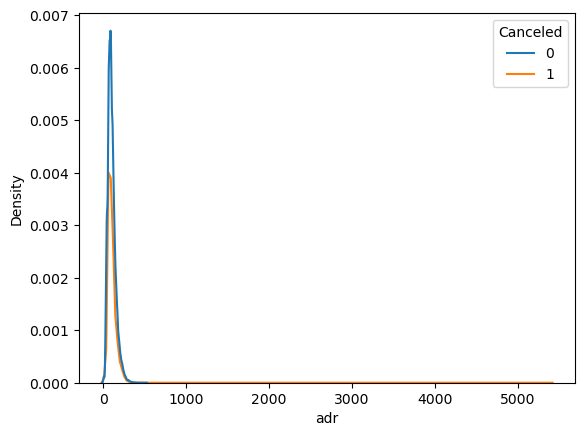

In [54]:
sns.kdeplot(x=linear_df['adr'], hue = linear_df['Canceled'])

Interestingly, there is higher densisity of higher prices for not cancelled bookings

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [ ]:

linear_df["Canceled"]=linear_df["Canceled"].astype(str)
print(linear_df['Canceled'].unique())


['0' '1']


C:\Users\User\AppData\Local\Temp\ipykernel_29456\279861969.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linear_df["Canceled"]=linear_df["Canceled"].astype(str)


In [77]:


linear_df['Canceled'] = linear_df['Canceled'].replace(regex='0', value='Not Canceled')
linear_df['Canceled'] = linear_df['Canceled'].replace(regex='1', value='Canceled')


C:\Users\User\AppData\Local\Temp\ipykernel_29456\2221083157.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linear_df['Canceled'] = linear_df['Canceled'].replace(regex='0', value='Not Canceled')
C:\Users\User\AppData\Local\Temp\ipykernel_29456\2221083157.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  linear_df['Canceled'] = linear_df['Canceled'].replace(regex='1', value='Canceled')


In [78]:
print(linear_df['Canceled'].unique())

['Not Canceled' 'Canceled']


In [82]:
y = linear_df['adr']
X= linear_df.loc[:, ['Canceled']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=100)
Z_train = pd.get_dummies(X_train['Canceled'], dtype='int')
Z_test = pd.get_dummies(X_test['Canceled'], dtype='int')

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

Rsq:  0.001503675267700455
RMSE:  46.71353683062311


,variable,coefficient
0,Canceled,105.691834
1,Not Canceled,102.370291


The coefficient is higher for canceled bookings

In [81]:
y = linear_df['adr']
X= linear_df.loc[:, ['lead_time', 'adults', 'children', 'previous_cancellations', 'total_of_special_requests', 'Canceled']]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=100)
Z_train = pd.concat([X_train[['lead_time', 'adults', 'children', 'previous_cancellations', 'total_of_special_requests']], pd.get_dummies(X_train['Canceled'], dtype='int')], axis = 1)
Z_test = pd.concat([X_test[['lead_time', 'adults', 'children', 'previous_cancellations', 'total_of_special_requests']], pd.get_dummies(X_test['Canceled'], dtype='int')], axis = 1)

reg = linear_model.LinearRegression(fit_intercept=False).fit(Z_train,y_train)

y_hat = reg.predict(Z_test)
print('Rsq: ', reg.score(Z_test,y_test))
rmse = np.sqrt( np.mean( (y_test - y_hat)**2 ))
print('RMSE: ', rmse)

results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_})
results

Rsq:  0.23082931537456075
RMSE:  40.999718682284765


,variable,coefficient
0,lead_time,-0.054120
1,adults,25.291589
2,children,38.030649
3,previous_cancellations,-2.988547
4,total_of_special_requests,7.712000
5,Canceled,59.728652
6,Not Canceled,50.787095


The coefficient for Canceled Bookings is higher than that of non-canceled bookings. Also, the most expensive type of bookings are the canceled ones with adults, children, and special requests. 

The R2 value is higher and the RMSE value is lower for the larger model, so it's performance is better than that of the smaller model.